<a href="https://colab.research.google.com/github/Ololade3/SGA_1_4/blob/main/mini_projectx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Dictionary http://localhost:8888/lab/tree/Untitled%20Folder%201/m.miniproject/Ulta%20Skincare%20Reviews.csv
- Review Title: The title of the review.Data Dictionary
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
Objectives
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.
Note:
The assignment should be submitted through a public GitHub repository.


Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?
Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.
Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [ ]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#!pip install lab_black
#%load_ext lab_black

In [ ]:
#reading data in
skincare_reviews = pd.read_csv("Untitled Folder 1/Ulta Skincare Reviews.csv", parse_dates=['Scrape_Date'])

In [ ]:
skincare_reviews.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27


Data cleaning

In [ ]:
skincare_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Review_Title           4150 non-null   object        
 1   Review_Text            4150 non-null   object        
 2   Verified_Buyer         4150 non-null   object        
 3   Review_Date            4150 non-null   object        
 4   Review_Location        4150 non-null   object        
 5   Review_Upvotes         4150 non-null   int64         
 6   Review_Downvotes       4150 non-null   int64         
 7   Product                4150 non-null   object        
 8   Brand                  4150 non-null   object        
 9   Scrape_Date            4150 non-null   datetime64[ns]
 10  polarity               4150 non-null   float64       
 11  subjectivity           4150 non-null   float64       
 12  review_text_sentiment  4150 non-null   float64       
dtypes: 

In [ ]:
skincare_reviews.shape

(4150, 10)

In [ ]:
# Check for null values in the entire DataFrame
print(skincare_reviews.isnull().sum())

Review_Title        0
Review_Text         3
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64


In [ ]:
skincare_reviews[skincare_reviews["Review_Text"].isna()]

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
3560,I would definitely buy this product again,NaN,Yes,3 years ago,MN,0,1,Daily Microfoliant,Dermalogica,2023-03-27
3684,Received a sample and loved it!,NaN,Yes,4 years ago,"Columbia, SC",0,0,Daily Microfoliant,Dermalogica,2023-03-27
3686,This product works,NaN,Yes,4 years ago,"Columbia, SC",0,0,Daily Microfoliant,Dermalogica,2023-03-27


since i have 3 missiing world Review_Text  i replaced it with review title

In [ ]:
skincare_reviews["Review_Text"]=np.where(skincare_reviews["Review_Text"].isna(),skincare_reviews["Review_Title"],skincare_reviews["Review_Text"])

In [ ]:
print(skincare_reviews.isnull().sum())

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64


In [ ]:
#replacung the only missing space in review_location with the most occuring
skincare_reviews["Review_Location"]=skincare_reviews["Review_Location"].fillna('Undisclosed')

In [ ]:
#checking to confirm no missing information again
skincare_reviews.isna().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [ ]:
skincare_reviews.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27


Explore the data

In [ ]:
# Unique values of Product with their counts
skincare_reviews['Product'].value_counts()

Product
Daily Superfoliant             1500
Daily Microfoliant             1500
Hydro Masque Exfoliant          800
Multi-Vitamin Thermafoliant     350
Name: count, dtype: int64

In [ ]:
skincare_reviews['Brand'].value_counts()

Brand
Dermalogica    4150
Name: count, dtype: int64

In [ ]:
 skincare_reviews['Review_Title'].value_counts()

Review_Title
Amazing product                    95
Love this mask                     90
It's hydrating                     89
Would absolutely buy this again    89
Buy it!                            89
                                   ..
I was supposed to get               1
Love this cleanser. Leaves my       1
Nice and soothing for winter        1
Go strong!                          1
This is the best!!!                 1
Name: count, Length: 2828, dtype: int64

In [ ]:
skincare_reviews['Review_Location'].value_counts()

Review_Location
Undisclosed        910
Los Angeles        117
Iowa                93
Richmond Va         89
Orlando, Fl         89
                  ... 
Devon                1
Southend-On-Sea      1
United Kingdom       1
Leicester            1
Fayetteville         1
Name: count, Length: 1423, dtype: int64

In [ ]:
skincare_reviews['Verified_Buyer'].value_counts()

Verified_Buyer
No     2901
Yes    1249
Name: count, dtype: int64

In [ ]:
skincare_reviews['Scrape_Date'].value_counts() 

Scrape_Date
2023-03-27    4150
Name: count, dtype: int64

In [ ]:
skincare_reviews['Review_Date']

0        15 days ago
1        27 days ago
2       2 months ago
3       2 months ago
4       2 months ago
            ...     
4145     7 years ago
4146     7 years ago
4147     7 years ago
4148     7 years ago
4149     7 years ago
Name: Review_Date, Length: 4150, dtype: object

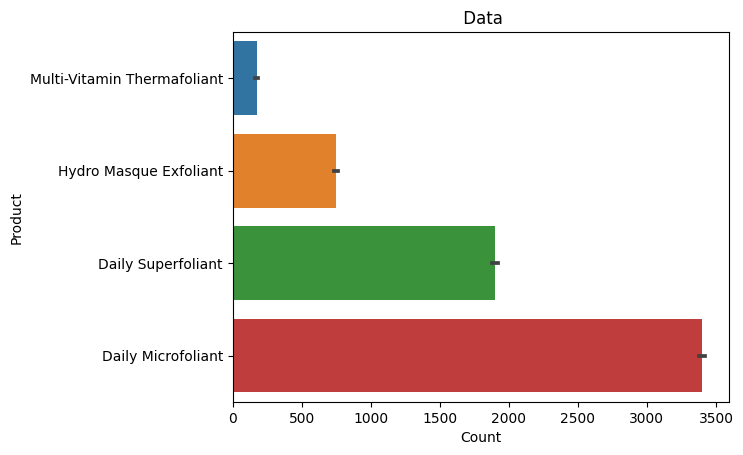

In [ ]:
import seaborn as sns


# Extract the data from the column
product_data = skincare_reviews['Product']

# Plot a bar chart using Seaborn
sns.barplot(x=product_data.index, y=product_data.values)

# Set the x-axis label
plt.xlabel('Count')

# Set the y-axis label
plt.ylabel('Product')

# Set the title of the chart
plt.title(' Data')

# Show the plot
plt.show()

In [ ]:
# loading in the language model pipeline from spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Load libraries
import unicodedata
import sys

def clean(data:pd.DataFrame, col:str)->None:
    ''' cleaning text'''

    #stopwords
    stopwords = nlp.Defaults.stop_words
    pat = r'\b(?:ive|im|{})\b'.format('|'.join(stopwords))

    # Create a dictionary of punctuation characters
    punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
     if unicodedata.category(chr(i)).startswith('P'))

    # For each string, remove any punctuation characters and stopwords
    data[col]=data[col].str.lower().str.translate(punctuation) 
    data[col]= data[col].str.replace(pat, '', regex=True)

    #remove emojis
    def deEmojify(inputString):
        return inputString.encode('ascii', 'ignore').decode('ascii')
    data[col]=data[col].apply(deEmojify)

In [ ]:
clean(skincare_reviews,'Review_Text')
clean(skincare_reviews,'Review_Title')

In [ ]:
skincare_review_text=' '.join(skincare_reviews['Review_Text'])


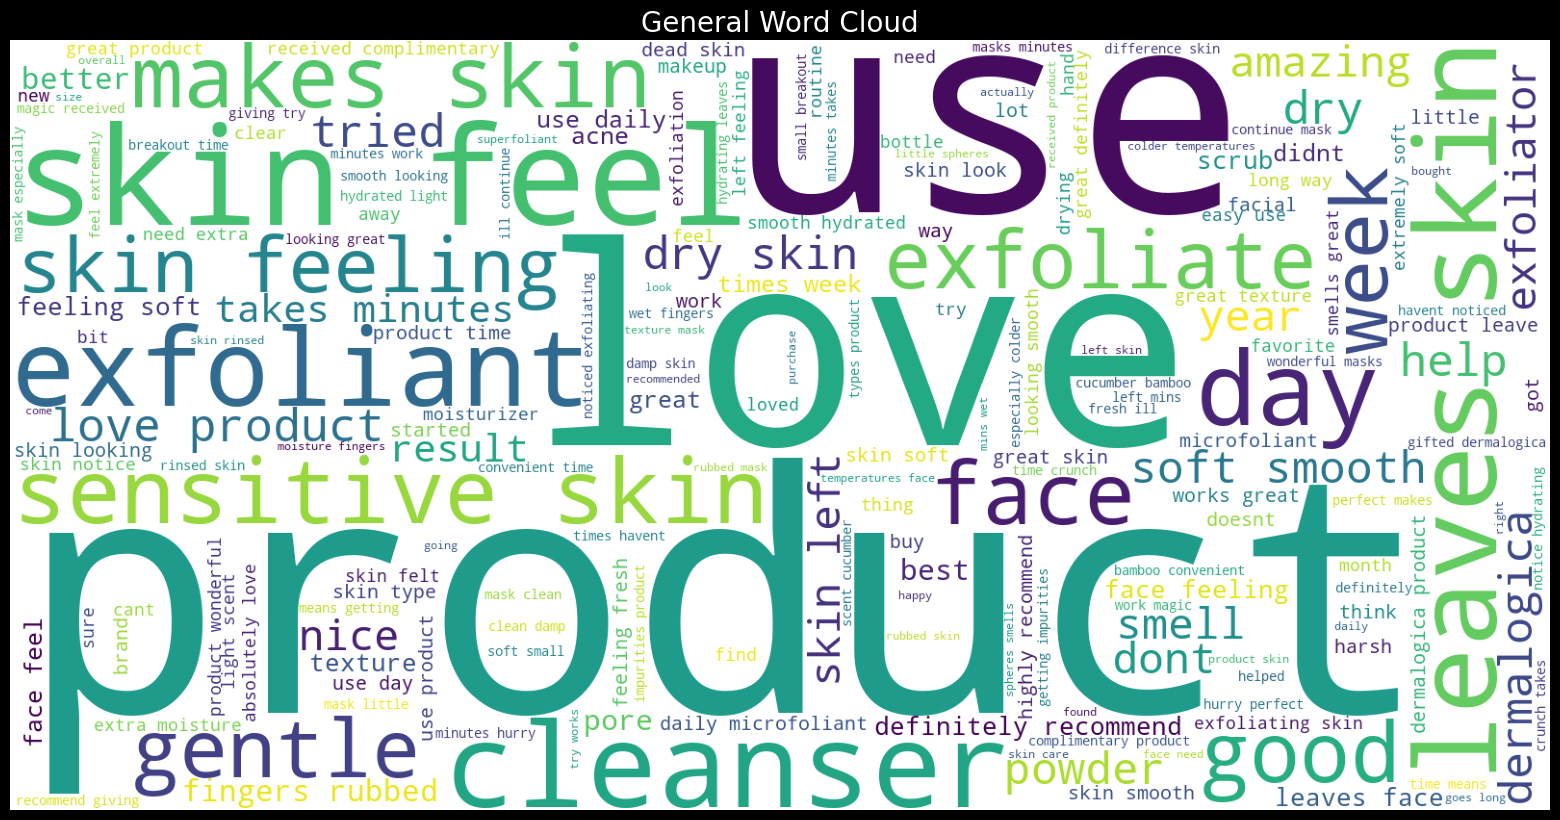

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10), facecolor='k')
wordcloud = WordCloud(background_color="white",
                      #max_font_size=40,
                      width=1600,
                      height=800,
                      random_state=42
                     ).generate(str(review_text))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('General Word Cloud',color='white', fontsize=20)
plt.show()

Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

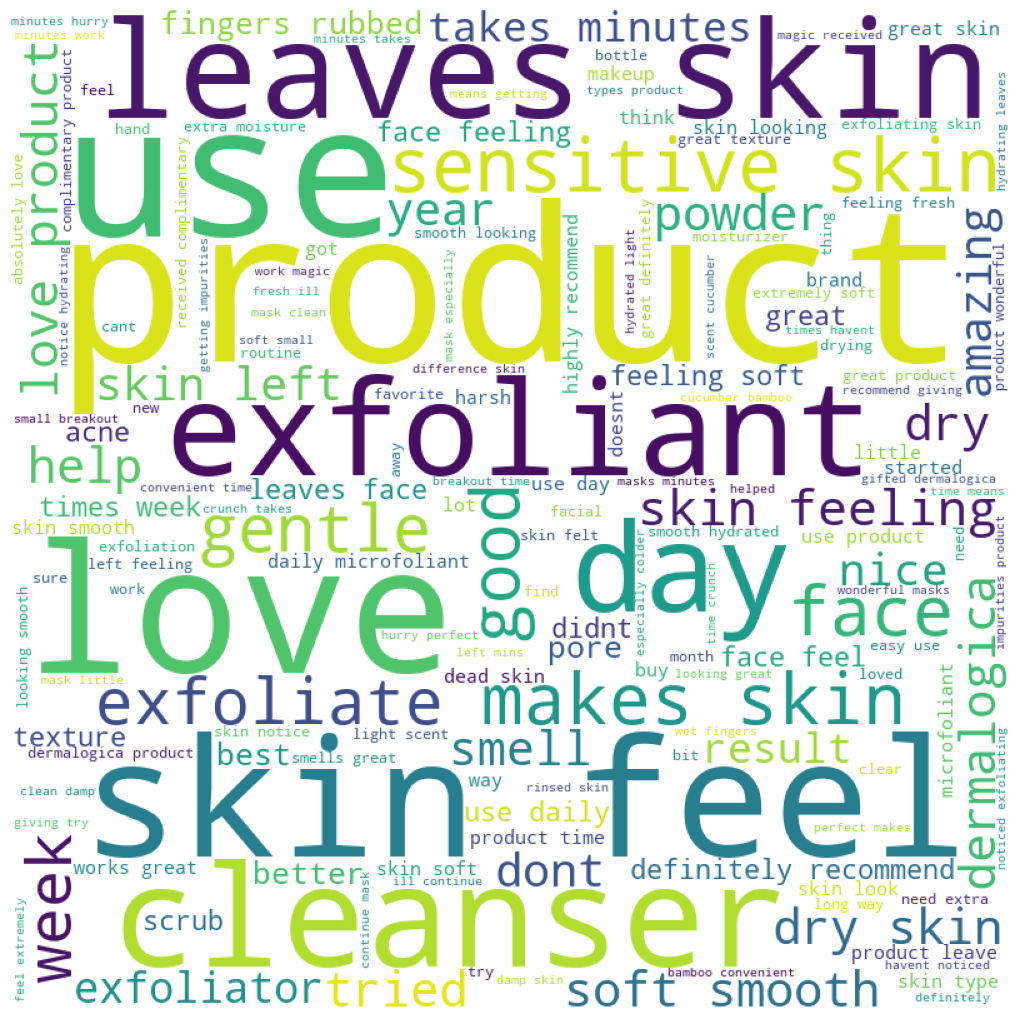

In [ ]:
# Concatenate all the reviews into a single string
word = ' '.join(skincare_reviews['Review_Text'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)

# Generate the wordcloud from the text data
wordcloud.generate(word)

# Visualize the wordcloud
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [ ]:
# #using the extended Spacy pipeline to get the polaritty score for each review text
skincare_reviews['review_text_sentiment']=skincare_reviews['Review_Text'].apply(lambda x: nlp(x)._.polarity)

In [ ]:
# Negative reviews
skincare_reviews[reviews['review_text_sentiment']==-1]

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,polarity,subjectivity,review_text_sentiment
1929,smell,smells horrific wont repurchase,No,3 years ago,Chicago,0,2,Daily Superfoliant,Dermalogica,2023-03-27,-1.0,1.0,-1.0
3467,smell awful,smells like porta potty awful,No,3 years ago,Fargo,0,1,Daily Microfoliant,Dermalogica,2023-03-27,-1.0,1.0,-1.0


In [ ]:
# positive reviews
skincare_reviews[reviews['review_text_sentiment']==1].head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,polarity,subjectivity,review_text_sentiment
29,great exfoliator skin,great exfoliator skin glows,No,4 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27,0.8,0.75,0.8
58,multivitamin thermafoliant,happy product makes skin glow,Yes,8 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27,0.8,1.00,0.8
74,best exfoliant,best found,Yes,10 months ago,Undisclosed,0,1,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27,1.0,0.30,1.0
83,great purchase,great purchase,Yes,1 year ago,Undisclosed,0,2,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27,0.8,0.75,0.8
112,highly recommended,dermalogicas best products,No,1 year ago,Undisclosed,0,1,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27,1.0,0.30,1.0


In [ ]:
# mixed reviews/in between
skincare_reviews[reviews['review_text_sentiment']==0].head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,polarity,subjectivity,review_text_sentiment
9,excelent,excelent,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27,0.0,0.0,0.0
18,great product,product 5 years like alot scub works welland skin feels like silk afer use,No,3 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27,0.0,0.0,0.0
21,love,feel product start work minute hits skin,No,3 months ago,Undisclosed,0,1,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27,0.0,0.0,0.0
45,use times,use times week benefits visible selfcare practice look forward,No,6 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27,0.0,0.0,0.0
52,yes like product,use product week,No,6 months ago,Verified Buyer,1,3,Multi-Vitamin Thermafoliant,Dermalogica,2023-03-27,0.0,0.0,0.0


In [ ]:
import pandas as pd
from textblob import TextBlob



# Define a function to calculate sentiment polarity and subjectivity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the sentiment analysis function to each review in the DataFrame
skincare_reviews['polarity'], skincare_reviews['subjectivity'] = zip(*skincare_reviews['Review_Text'].apply(get_sentiment))

# Print the average sentiment polarity and subjectivity for the dataset
print('Average polarity:', skincare_reviews['polarity'].mean())
print('Average subjectivity:', skincare_reviews['subjectivity'].mean())

# Print the DataFrame with the sentiment scores for each review
print(skincare_reviews[['Review_Text', 'polarity', 'subjectivity']])

Average polarity: 0.274710597724712
Average subjectivity: 0.5741293397112489
                                                                                                                                                                                                                                                                                                                                                                                                                                         Review_Text   
0                                                                                                                                                                                                                                                                                                                                                                                          love     face    shower heats   gives  light scrub nicely  \
1                                          

In [ ]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x2670cc1a9e0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x2670cc18dc0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x2670eec0970>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x2671013b100>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x26710126ec0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x2670eec2260>),
 ('spacytextblob',
  <spacytextblob.spacytextblob.SpacyTextBlob at 0x26716d4dd80>)]

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score


In [ ]:
#spliting data 
X= skincare_reviews["Review_Text"]
y = skincare_reviews["review_text_sentiment"]

# Split data
X_train, X_validate, y_train, y_validate = train_test_split(
    X, y, test_size=0.1, random_state=123
)

X_train.shape, X_validate.shape

((3735,), (415,))

In [ ]:

# Preprocess the text df_copy
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X = tfidf.fit_transform(skincare_reviews['Review_Text'])
y = skincare_reviews['review_text_sentiment']

# Split the df_copy into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion)
Accuracy: 0.93296853625171

ValueError: Unknown label type: 'continuous'

In [ ]:
mnb = MultinomialNB()

cv = CountVectorizer()

pipeline_count = Pipeline(
    steps=[
        # ========column transfomer=======
        ("count_vectorizer", cv),
        # ==========lostic regression======
        ("multi_nomial_nb", mnb),
    ]
)

pipeline_count

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('multi_nomial_nb', MultinomialNB())])